In [1]:
import pandas as pd
segment_data = pd.read_csv('data/003_segments.csv')
segment_data.head()

,Segment,age,gender,income,kids,own_home,subscribe
0,travelers,60.794945,male,57014.537526,0,True,False
1,travelers,61.764535,female,43796.941252,0,False,False
2,travelers,47.493356,male,51095.344683,0,True,False
3,travelers,60.963694,male,56457.722237,0,True,True
4,travelers,60.594199,female,103020.070798,0,True,False


In [2]:
segment_data.describe()

,age,income,kids
count,300.000000,300.000000,300.000000
mean,40.923350,50669.454237,1.273333
std,12.827494,19336.497748,1.413725
min,18.388730,11297.309231,0.000000
25%,32.870035,41075.804389,0.000000
50%,38.896711,51560.344807,1.000000
75%,47.987569,62172.668698,2.000000
max,79.650722,108830.388732,7.000000


## Finding descriptives by group.

In [4]:
segment_data.loc[segment_data.Segment == 'moving_up']['income'].mean()

51763.55266630597

In [5]:
segment_data.loc[
    (segment_data['Segment'] == 'moving_up') &
    (segment_data['subscribe'] == False)
]['income'].mean()

52495.6820839035

In [6]:
segment_data.groupby('Segment')['income'].mean()

Segment
moving_up     51763.552666
suburb_mix    55552.282925
travelers     62609.655328
urban_hip     20267.737317
Name: income, dtype: float64

In [7]:
segment_data.groupby(['Segment', 'subscribe'])['income'].mean()

Segment     subscribe
moving_up   False        52495.682084
            True         49079.078135
suburb_mix  False        55332.038973
            True         58478.381142
travelers   False        62940.429960
            True         49709.444658
urban_hip   False        20496.375001
            True         19457.112800
Name: income, dtype: float64

In [8]:
segment_data.groupby(
    ['Segment', 'subscribe']
)['income'].mean().unstack()

subscribe,False,True
Segment,,
moving_up,52495.682084,49079.078135
suburb_mix,55332.038973,58478.381142
travelers,62940.429960,49709.444658
urban_hip,20496.375001,19457.112800


In [11]:
segment_income = segment_data.groupby('Segment')['income'].mean()
segment_data = segment_data.join(segment_income,
                                 on='Segment',
                                 rsuffix='_segment')
segment_data.head(5)

,Segment,age,gender,income,kids,own_home,subscribe,income_segment,income_segment
0,travelers,60.794945,male,57014.537526,0,True,False,62609.655328,62609.655328
1,travelers,61.764535,female,43796.941252,0,False,False,62609.655328,62609.655328
2,travelers,47.493356,male,51095.344683,0,True,False,62609.655328,62609.655328
3,travelers,60.963694,male,56457.722237,0,True,True,62609.655328,62609.655328
4,travelers,60.594199,female,103020.070798,0,True,False,62609.655328,62609.655328


In [12]:
segment_data.drop(labels='income_segment', axis=1, inplace=True)
segment_data.head(5)

,Segment,age,gender,income,kids,own_home,subscribe
0,travelers,60.794945,male,57014.537526,0,True,False
1,travelers,61.764535,female,43796.941252,0,False,False
2,travelers,47.493356,male,51095.344683,0,True,False
3,travelers,60.963694,male,56457.722237,0,True,True
4,travelers,60.594199,female,103020.070798,0,True,False


### Descriptives for two-way groups.

In [13]:
segment_data.groupby(['Segment', 'own_home'])['income'].mean()

Segment     own_home
moving_up   False       51430.222115
            True        52363.547659
suburb_mix  False       56764.508540
            True        54239.038508
travelers   False       62923.233941
            True        62449.907732
urban_hip   False       20139.092369
            True        21057.984851
Name: income, dtype: float64

In [14]:
segment_data.groupby(
    ['Segment', 'own_home', 'subscribe']
)['income'].mean()

Segment     own_home  subscribe
moving_up   False     False        52380.092911
                      True         47630.738931
            True      False        52714.693149
                      True         51251.586942
suburb_mix  False     False        56478.645027
                      True         59451.625569
            True      False        54160.506701
                      True         56045.270075
travelers   False     False        62923.233941
            True      False        62949.533735
                      True         49709.444658
urban_hip   False     False        20171.798013
                      True         20031.163747
            True      False        22281.548438
                      True         13716.603325
Name: income, dtype: float64

In [15]:
segment_data.groupby(
    ['Segment', 'own_home', 'subscribe']
)['income'].mean().unstack()

subscribe                   False          True
Segment    own_home                            
moving_up  False     52380.092911  47630.738931
           True      52714.693149  51251.586942
suburb_mix False     56478.645027  59451.625569
           True      54160.506701  56045.270075
travelers  False     62923.233941           NaN
           True      62949.533735  49709.444658
urban_hip  False     20171.798013  20031.163747
           True      22281.548438  13716.603325

In [16]:
segment_data.groupby(
    ['Segment', 'own_home']
)['subscribe'].count().unstack()

own_home,False,True
Segment,,
moving_up,45,25
suburb_mix,52,48
travelers,27,53
urban_hip,43,7


In [17]:
segment_data.groupby(
    ['kids', 'Segment']
).subscribe.count().unstack(level=1)

Segment,moving_up,suburb_mix,travelers,urban_hip
kids,,,,
0,13.0,15.0,80.0,14.0
1,18.0,27.0,NaN,21.0
2,21.0,21.0,NaN,12.0
3,9.0,29.0,NaN,1.0
4,5.0,3.0,NaN,1.0
5,2.0,3.0,NaN,1.0
6,1.0,2.0,NaN,NaN
7,1.0,NaN,NaN,NaN


In [18]:
pd.crosstab(segment_data['kids'], segment_data['Segment'])

Segment,moving_up,suburb_mix,travelers,urban_hip
kids,,,,
0,13,15,80,14
1,18,27,0,21
2,21,21,0,12
3,9,29,0,1
4,5,3,0,1
5,2,3,0,1
6,1,2,0,0
7,1,0,0,0


In [19]:
segment_data.groupby('Segment')['kids'].sum()

Segment
moving_up     130
suburb_mix    195
travelers       0
urban_hip      57
Name: kids, dtype: int64

### Visualization by group: frequencies and proportions.

Text(0.5, 0, 'counts')

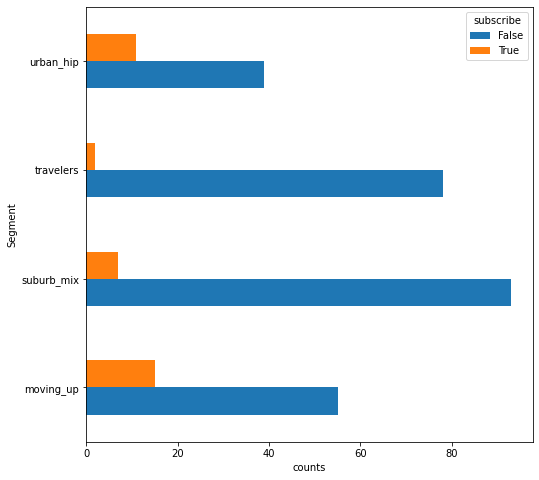

In [20]:
import matplotlib.pyplot as plt

segments_groupby_segments = segment_data.groupby(['Segment']) 
segments_groupby_segments['subscribe'].value_counts().unstack().plot(
    kind='barh',
    figsize=(8, 8)
)
plt.xlabel('counts')

Text(0.5, 0, 'proportion of segment')

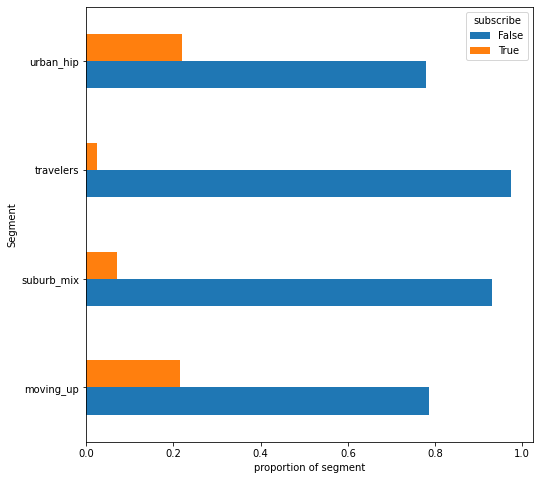

In [21]:
segments_groupby_segments['subscribe'].value_counts(
    normalize=True
).unstack().plot(
    kind='barh',
    figsize=(8, 8)
)
plt.xlabel('proportion of segment')

Text(0.5, 0, 'proportion of subscribers')

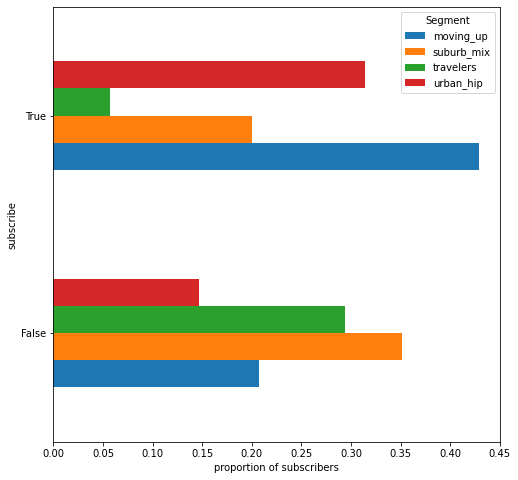

In [22]:
segment_data.groupby(['subscribe'])['Segment'].value_counts(
    normalize=True
).unstack().plot(kind='barh', figsize=(8, 8))
plt.xlabel('proportion of subscribers')

<AxesSubplot:xlabel='subscribe', ylabel='Segment'>

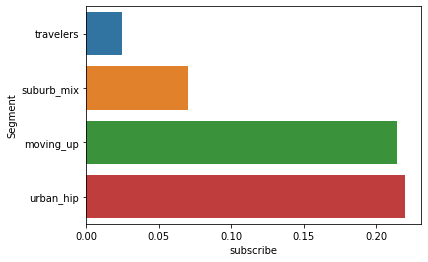

In [23]:
import seaborn as sns
sns.barplot(y='Segment', x='subscribe', data=segment_data,
            orient='h', ci=None)

C:\Users\Stefan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\axisgrid.py:643: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
C:\Users\Stefan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\_core.py:1319: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
C:\Users\Stefan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\_core.py:1319: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
C:\Users\Stefan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-

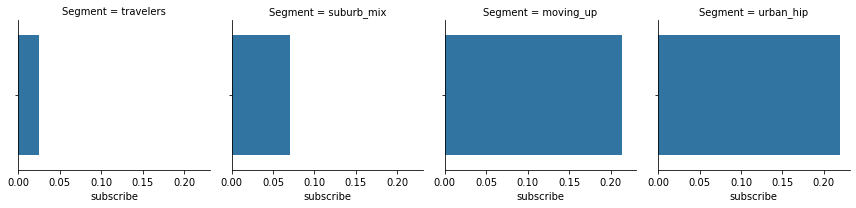

In [25]:
g = sns.FacetGrid(segment_data, col='Segment')
g.map(sns.barplot, 'subscribe', orient='v', ci=None)

<AxesSubplot:xlabel='Segment'>

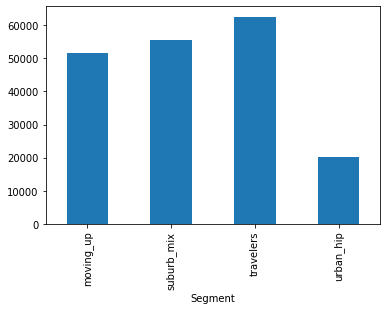

In [27]:
segment_data.groupby(['Segment'])['income'].mean().plot.bar()

<AxesSubplot:xlabel='Segment', ylabel='income'>

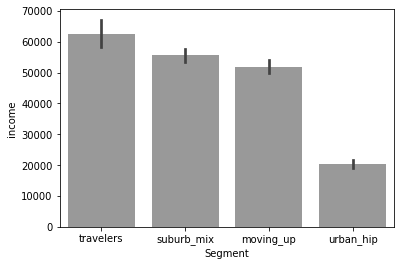

In [36]:
sns.barplot(x='Segment', y='income', data=segment_data, color='.6', 
            estimator=np.mean, ci=95) # With 95% confidence interval.

<AxesSubplot:xlabel='Segment'>

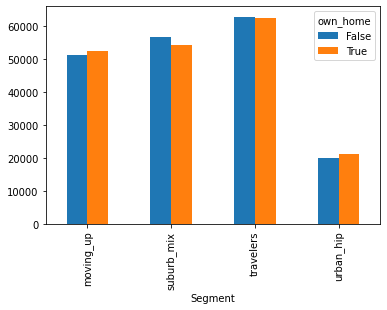

In [29]:
segment_data.groupby(
    ['Segment', 'own_home']
)['income'].mean().unstack().plot.bar()

<AxesSubplot:xlabel='Segment', ylabel='income'>

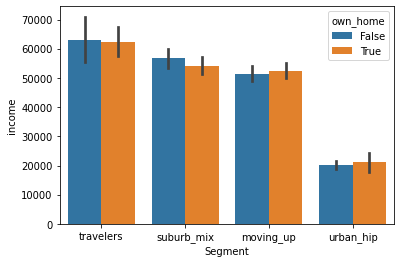

In [30]:
sns.barplot(x='Segment', y='income', hue='own_home',
            data=segment_data, estimator=np.mean, ci=95)

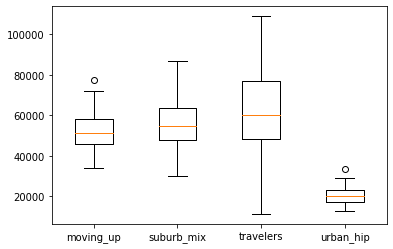

In [31]:
x = segment_data.groupby('Segment')['income'].apply(list)
_ = plt.boxplot(x=x.values, labels=x.index)

<AxesSubplot:xlabel='Segment', ylabel='income'>

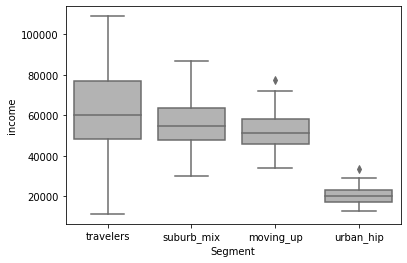

In [32]:
sns.boxplot(x='Segment', y='income', data=segment_data,
            color='0.7', orient='v')

<AxesSubplot:xlabel='income', ylabel='Segment'>

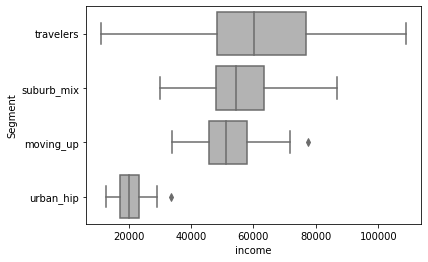

In [33]:
sns.boxplot(y='Segment', x='income', data=segment_data, 
            color='0.7', orient='h')

<AxesSubplot:xlabel='income', ylabel='Segment'>

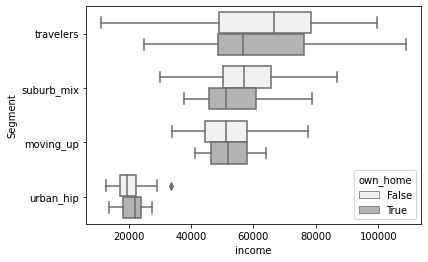

In [34]:
sns.boxplot(y='Segment', x='income', hue='own_home',
            data=segment_data, color='0.7', orient='h')